A family of algorithms known as neural networks has recently seen a lot of attention in the field of machine learning. These algorithms are inspired by the structure of the human brain and are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

Here, we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks

## The neural network model

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision:

$$\hat{y}(x) = w[0] * x[0] + w[1] * x[1] + \ldots + w[p] * x[p] + b$$

where $w[i]$ are the weights and $b$ is the bias. In a neural network, there is an additional intermediate layer, called the hidden layer, that allows the model to capture more complex structures in the data.

In [17]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

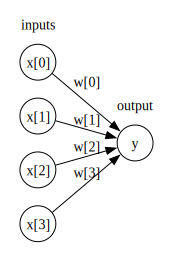

In [4]:
display(mglearn.plots.plot_logistic_regression_graph())

Here, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the node on the right represents the output, which could be a prediction. Each node in the hidden layer is a weighted sum of the input features, passed through a nonlinear function, such as the rectified linear activation function (ReLU). The output of the hidden layer is then used as input for the output layer. The output layer is also a weighted sum of the values in the hidden layer, passed through a nonlinear function.

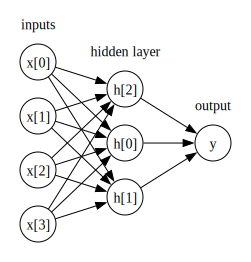

In [5]:
display(mglearn.plots.plot_single_hidden_layer_graph())

The graph above is a simple example of a neural network with one hidden layer with three nodes. The input layer has 4 features, and the output layer has 1 nodes. The input layer does not perform any computation, it just represents the input features. The output layer is responsible for making the prediction.

The full formula for computing the output of the hidden layer is:

$$h[0] = \sigma(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])$$
$$h[1] = \sigma(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])$$
$$h[2] = \sigma(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2])$$

where $\sigma$ is the activation function, $w[i, j]$ are the weights, and $b[i]$ are the biases. The output of the hidden layer is then used as input for the output layer:

$$\hat{y}(x) = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + c$$

where $v[i]$ are the weights and $c$ is the bias.

A non-linear activation function is a key component of neural networks. It allows the model to capture non-linearities. You can review them [here](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions).

Text(0, 0.5, 'relu(x), tanh(x)')

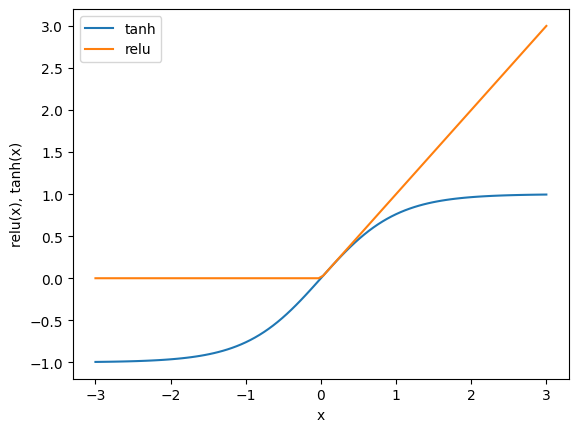

In [6]:
# Some activation functions (Tanh and ReLU)
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

But a neural network commonly more than one hidden layer. In this case, the output of the first hidden layer is used as input for the second hidden layer, and so on, until the final output layer. This is called a deep neural network or deep learning.

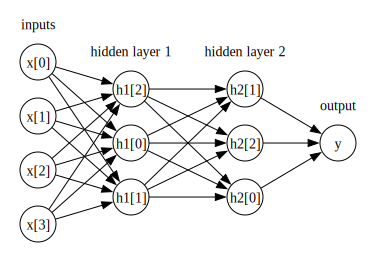

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

## Tuning neural networks

Let's test them on a custom dataset. We will use the `make_moons` function from the `datasets` module to generate a two-dimensional binary classification dataset.

Text(0, 0.5, 'Feature 1')

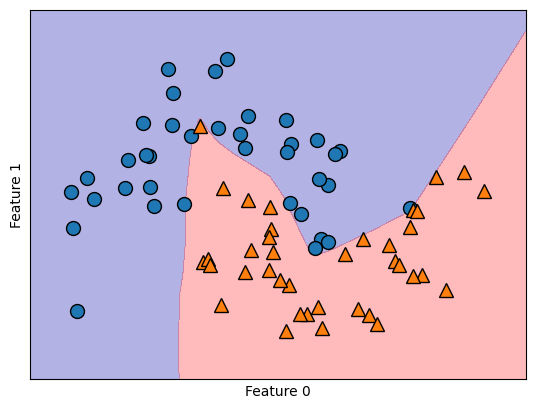

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As you can see, the neural network learned a very nonlinear but relatively smooth decision boundary.

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset. We can reduce the number (which reduces the complexity of the model) and still get a good result

c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

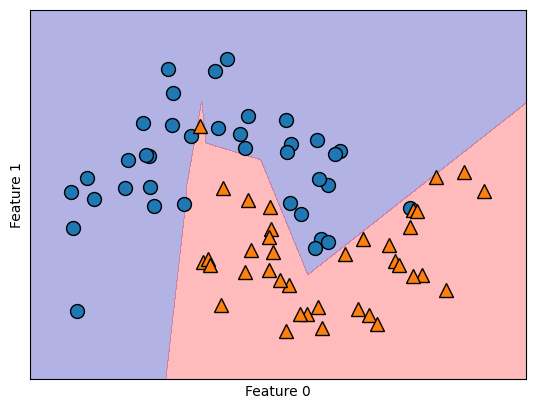

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With only 10 hidden units, the decision boundary looks somewhat more ragged. With a single hidden layer, this means the decision function will be made up of 10 straight line segments. If we want a smoother decision boundary, we could add more hidden units add a second hidden layer, or use the tanh nonlinearity:

Text(0, 0.5, 'Feature 1')

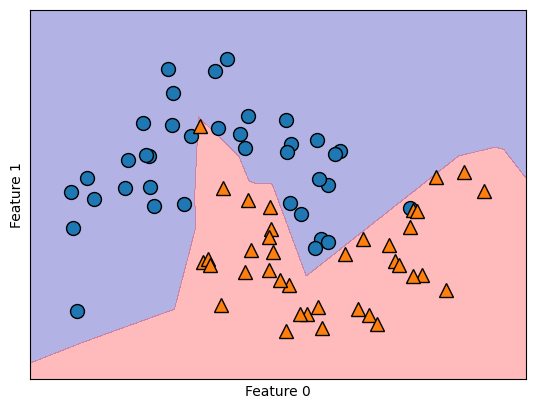

In [11]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='relu',
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

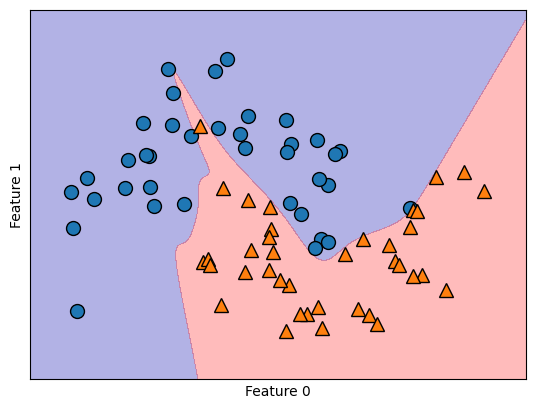

In [12]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh',
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We can control the complexity of the model by using the penalty parameter. There is 2 parameters that control the complexity of the model: `alpha` and `hidden_layer_sizes`. The `alpha` parameter is the L2 penalty (regularization term) parameter. Increasing `alpha` increases the penalty for large weights, and thus the model will be more conservative about the weights of the model. The `hidden_layer_sizes` parameter controls the number of hidden layers and the number of nodes in each layer. By default, the `hidden_layer_sizes` parameter is set to 100, which is quite a lot for this small dataset.

c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_m

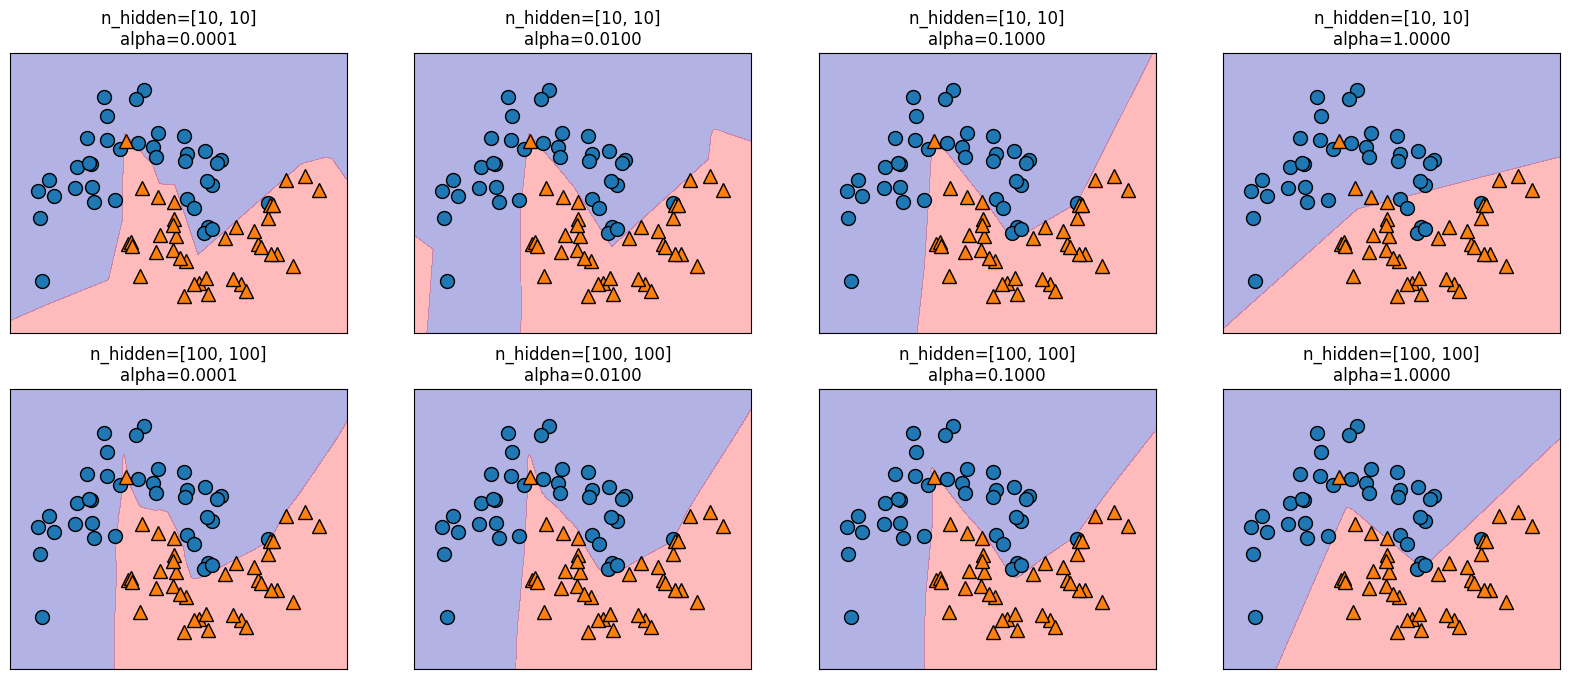

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
        alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))

An important property of neural networks is that their weights are set randomly before learning is started, and this random initialization affects the model that is learned. That means that even when using exactly the same parameters, we can obtain very different models when using different random seeds. If the networks are large, and their complexity is chosen properly, this should not affect accuracy too much, but it is worth keeping in mind (particularly for smaller networks).

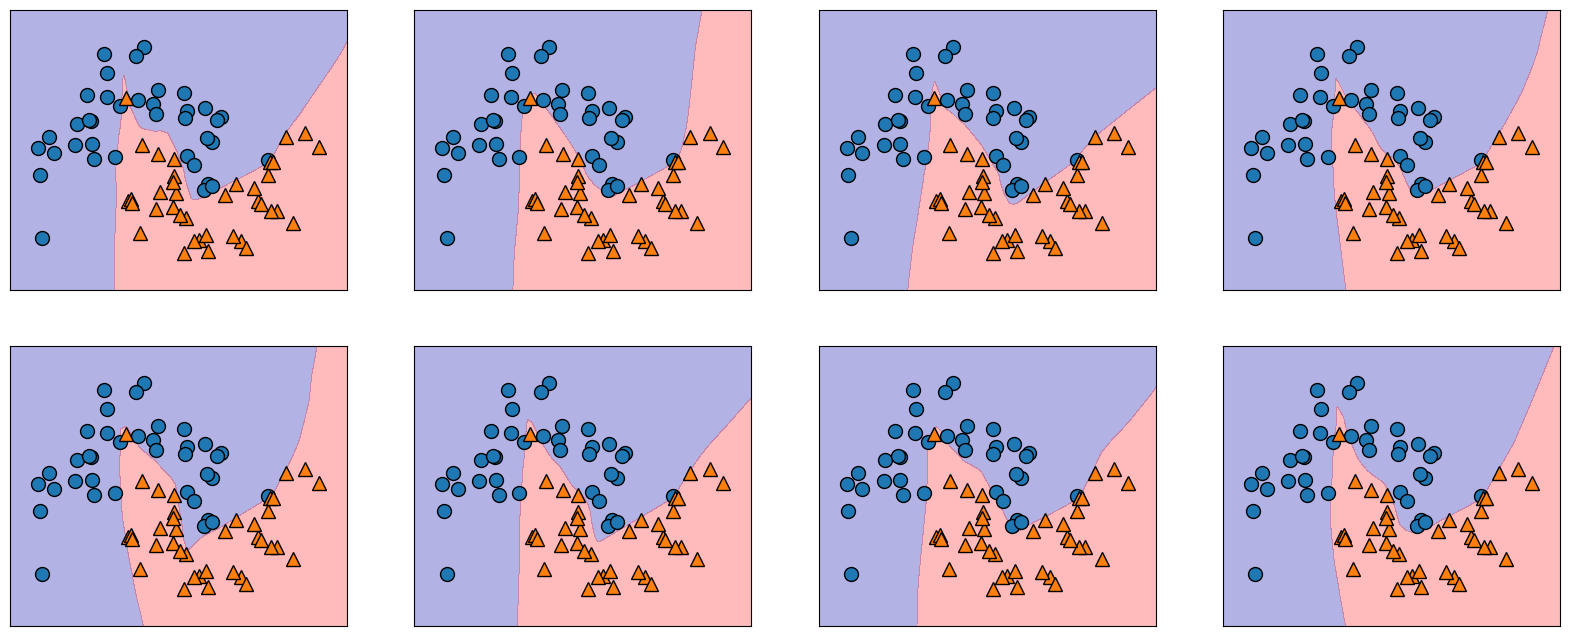

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
    hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [18]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [20]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [21]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


While it is possible to analyze what a neural network has learned, this is usually much trickier than analyzing a linear model or a tree-based model. One way to introspect what was learned is to look at the weights in the model.

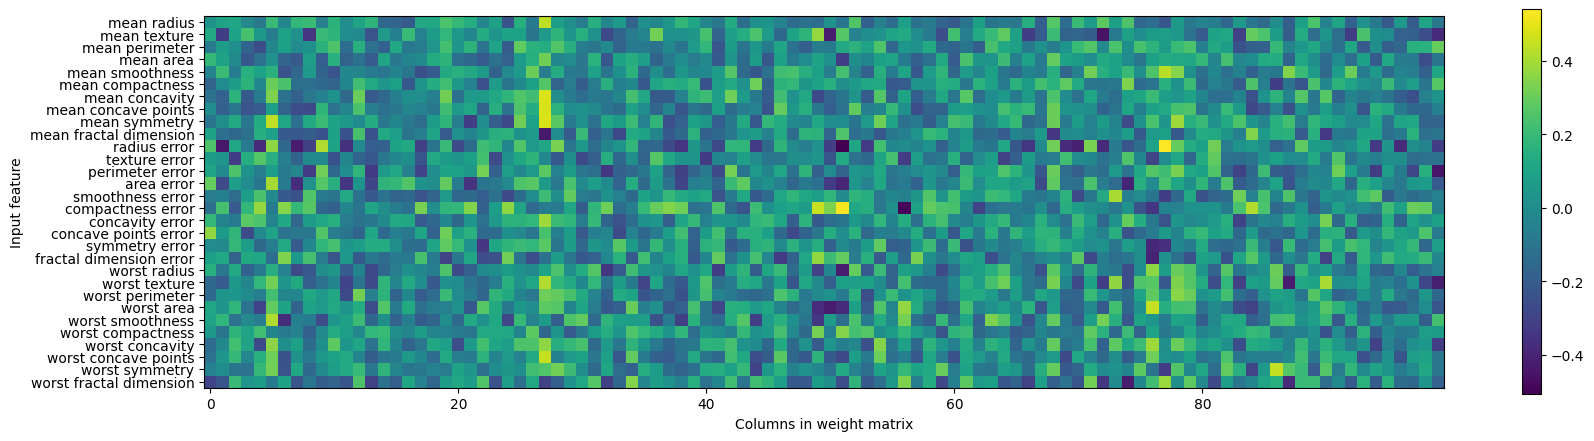

In [22]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.

To dive deeper into deep learning, keras, a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano, is a good starting point. It allows for easy and fast prototyping, and supports both convolutional networks and recurrent networks, as well as combinations of the two.

Beside Keras, pytorch is another popular library for deep learning. It is a deep learning framework that puts a strong emphasis on autograd, which is a core technique for computing gradients. Autograd is a key technique that makes training deep learning models easy. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

## Pros and cons of neural networks

Neural networks have reemerged as state-of-the-art models in many applications of machine learning. They are very powerful models, but they are also relatively slow to train. They require careful preprocessing of the data, as well as tuning of the model’s parameters, and are almost impossible to understand once trained. This means that it is very hard to tell what the model has learned. They are also sensitive to the scale of the input data, and require all input features to vary in a similar way. They also require a lot of data to estimate the model’s parameters reliably.

But on the other side, NN particularly the large and powerful, it mean often take a long time to train, and are also sensitive to the quality of the data. Complex models are also hard to interpret, and it is not always clear what the model has learned.

A common way to adjust parameters in a neural network is to first create a network that is large enough to overfit, making sure that the task can actually be learned by the network. Then, once you know the training data can be learned, either shrink the network or increase alpha to add regularization, which will improve generalization performance.